In [1]:
from collections import defaultdict
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage.filters import gaussian_filter1d

from data_processing import *

In [2]:
DATA_PATH = "./data/"

### Loading Data

In [3]:
# Load interventions data
df_dates = pd.read_csv(DATA_PATH + "interventions.csv", index_col="lang")
df_dates = process_interventions_data(df_dates)

# Load pageview data
df_pageviews = pd.read_json(DATA_PATH + "aggregated_timeseries.json.gz")

# Load mobility data
df_transport = pd.read_csv(DATA_PATH + "applemobilitytrends-2020-04-20.csv.gz")
df_transport = process_transport_data(df_transport)

# Load mobility data
df_mobility = pd.read_csv(
    DATA_PATH + "Global_Mobility_Report.csv.gz", parse_dates=["date"], low_memory=False,
)
df_mobility = process_mobility_data(df_mobility)

### Impact of Measures

In this section, we will see how the mesures taken by governments impact the population's behaviour, and therefore potentially deduce how much confidence they have in their politicians. We assume that a citizen will follow the government's measures if they consider that the decisions taken are adequate for the situation. On the other hand, if they disapprove them, they will not respect the imposed rules.

We will see through mobility data how populations reacted to the announcement of a lockdown, through the examples of Norway and Serbia.

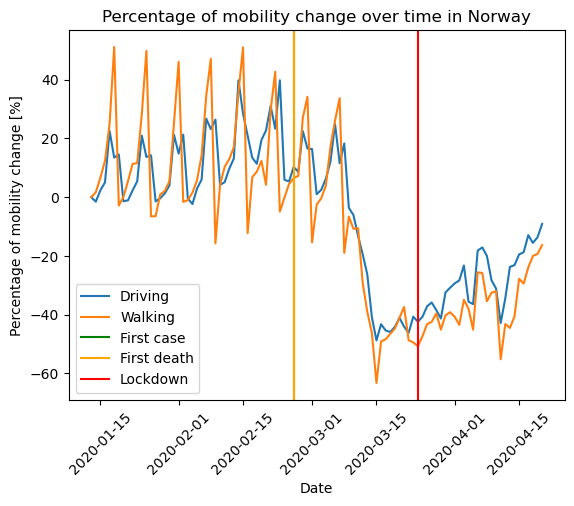

In [4]:
# Query Norway transportation data
norway_data_transport_drive = df_transport.loc["no", "driving"]
norway_data_transport_walk = df_transport.loc["no", "walking"]
norway_data_transport = norway_data_transport_drive.merge(
    norway_data_transport_walk, on="date", suffixes=["_drive", "_walk"]
)
norway_data_transport.index = pd.to_datetime(norway_data_transport.index)

# Get Norway mobility reduction date
first_case_norway = datetime.date(df_dates.loc["no"]["1st case"])
first_death_norway = datetime.date(df_dates.loc["no"]["1st death"])
lockdown_norway = datetime.date(df_dates.loc["no"]["Lockdown"])

# Plotting
plt.plot(norway_data_transport)
plt.title("Percentage of mobility change over time in Norway")
plt.xlabel("Date")
plt.ylabel("Percentage of mobility change [%]")
plt.axvline(x=first_case_norway, color="green")
plt.axvline(x=first_death_norway, color="orange")
plt.axvline(x=lockdown_norway, color="red")
plt.legend(
    ["Driving", "Walking", "First case", "First death", "Lockdown"], loc="lower left",
)
plt.xticks(rotation=45)
plt.show()

We see that the pecentage of mobility from baseline decreases very quickly before a lockdown was imposed. However, we see that mobility was starting to recover after a lockdown was imposed. This could suggest low confidence and unpopularity in the government's imposed sanitary measures.

Number of distinct covid-related pages in Norway: 10


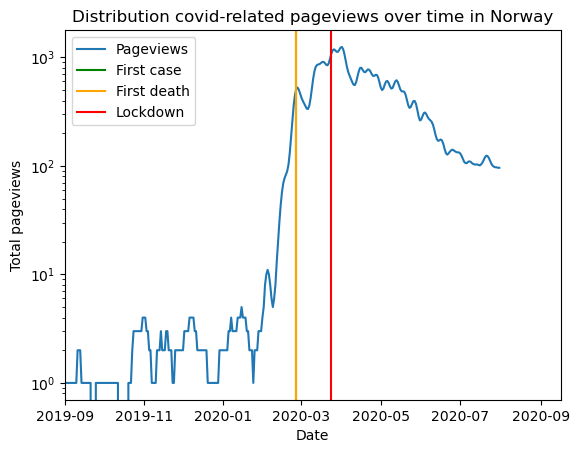

In [5]:
covid_pages_numb_no = df_pageviews["no"]["covid"]["len"]

print(f"Number of distinct covid-related pages in Norway: {covid_pages_numb_no}")

covid_pages_view_no = df_pageviews["no"]["covid"]["sum"]
covid_pages_view_no = pd.DataFrame(
    covid_pages_view_no.items(), columns=["Date", "PageView"]
)

# Change format of date
covid_pages_view_no["Date"] = pd.to_datetime(covid_pages_view_no["Date"]).dt.date
covid_pages_norway = gaussian_filter1d(covid_pages_view_no["PageView"], sigma=2)

plt.plot(covid_pages_view_no["Date"], covid_pages_norway)
plt.title("Distribution covid-related pageviews over time in Norway")
plt.xlim(pd.to_datetime("2019-09"))
plt.xlabel("Date")
plt.ylabel("Total pageviews")
plt.yscale("log")
plt.axvline(x=first_case_norway, color="green")
plt.axvline(x=first_death_norway, color="orange")
plt.axvline(x=lockdown_norway, color="red")
plt.legend(
    ["Pageviews", "First case", "First death", "Lockdown"], loc="upper left",
)
plt.show()

The pageviews can reflect how strong the impact of the measures is on the population, if we assume that COVID-19 related pageviews reflects how impacted they are by them.

Next, we look at the data from Serbia.

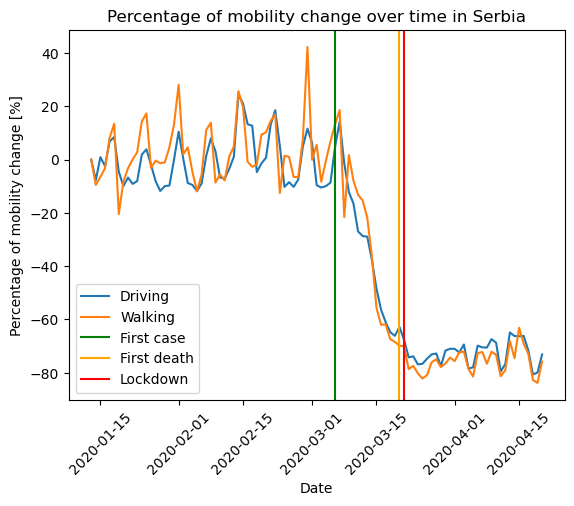

In [6]:
# Query Serbia transportation data
serbia_data_transport_drive = df_transport.loc["rs", "driving"]
serbia_data_transport_walk = df_transport.loc["rs", "walking"]
serbia_data_transport = serbia_data_transport_drive.merge(
    serbia_data_transport_walk, on="date", suffixes=["_drive", "_walk"]
)
serbia_data_transport.index = pd.to_datetime(serbia_data_transport.index)

# Get Serbia mobility reduction date
first_case_serbia = datetime.date(df_dates.loc["sr"]["1st case"])
first_death_serbia = datetime.date(df_dates.loc["sr"]["1st death"])
lockdown_serbia = datetime.date(df_dates.loc["sr"]["Lockdown"])

# Plotting
plt.plot(serbia_data_transport)
plt.title("Percentage of mobility change over time in Serbia")
plt.xlabel("Date")
plt.ylabel("Percentage of mobility change [%]")
plt.axvline(x=first_case_serbia, color="green")
plt.axvline(x=first_death_serbia, color="orange")
plt.axvline(x=lockdown_serbia, color="red")
plt.legend(
    ["Driving", "Walking", "First case", "First death", "Lockdown"], loc="lower left",
)
plt.xticks(rotation=45)
plt.show()

We see that the percentage of mobility change from the baseline remains stable after the lockdown is imposed, which could reflect the population's agreement in the government's action.

Number of distinct covid-related pages in Serbia: 9


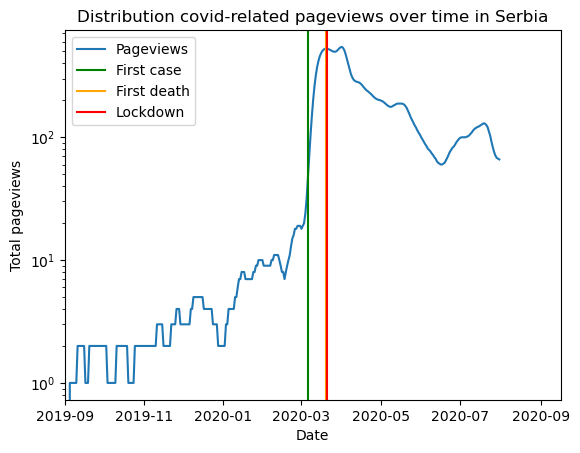

In [7]:
covid_pages_numb_rs = df_pageviews["sr"]["covid"]["len"]

print(f"Number of distinct covid-related pages in Serbia: {covid_pages_numb_rs}")

covid_pages_view_rs = df_pageviews["sr"]["covid"]["sum"]
covid_pages_view_rs = pd.DataFrame(
    covid_pages_view_rs.items(), columns=["Date", "PageView"]
)

# Set index columns
covid_pages_view_rs["Date"] = pd.to_datetime(covid_pages_view_rs["Date"]).dt.date

covid_pages_serbia = gaussian_filter1d(covid_pages_view_rs["PageView"], sigma=3)

plt.plot(covid_pages_view_rs["Date"], covid_pages_serbia)
plt.title("Distribution covid-related pageviews over time in Serbia")
plt.xlabel("Date")
plt.ylabel("Total pageviews")
plt.yscale("log")
plt.xlim(pd.to_datetime("2019-09"))
plt.axvline(x=first_case_serbia, color="green")
plt.axvline(x=first_death_serbia, color="orange")
plt.axvline(x=lockdown_serbia, color="red")
plt.legend(
    ["Pageviews", "First case", "First death", "Lockdown"], loc="upper left",
)
plt.show()

### Google Mobility Data

We can have a look at how does the residential mobility changed through time and see how people respected the measures.

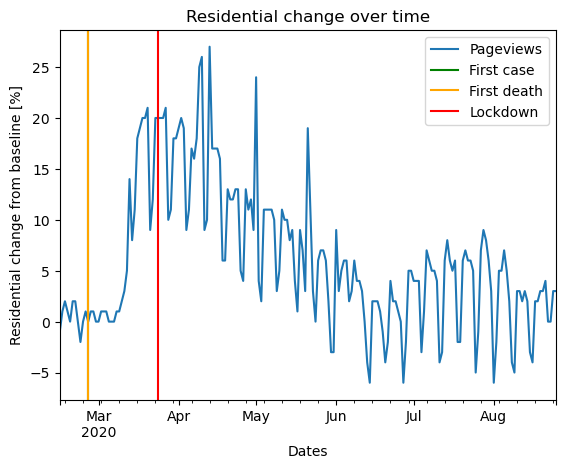

In [8]:
residential_mobility_no = df_mobility.loc["no"]

residential_mobility_no["residential_percent_change_from_baseline"].plot(
    title="Residential change over time",
    xlabel="Dates",
    ylabel="Residential change from baseline [%]",
)

plt.axvline(x=first_case_norway, color="green")
plt.axvline(x=first_death_norway, color="orange")
plt.axvline(x=lockdown_norway, color="red")
plt.legend(
    ["Pageviews", "First case", "First death", "Lockdown"], loc="upper right",
)
plt.show()

We can examine the mobility data and deduce that at the beginning of the pandemic, people spent a lot more time than usual at home. We see that only in the summer did this return to pre-pandemic levels.